In [1]:
%load_ext ferretmagic

In [2]:
%%ferret
use CORIOLIS-GLOBAL-NRTOA-OBS_TIME_SERIE_1663047844192.nc
show data
show grid TEMP

currently SET data sets:
 1> ./CORIOLIS-GLOBAL-NRTOA-OBS_TIME_SERIE_1663047844192.nc (default)
 name title I J K L
 TEMP sea_water_temperature 1:21 1:11 1:152 1:12
 PSAL sea_water_salinity 1:21 1:11 1:152 1:12
 
 GRID GFZ1
 name axis # pts start end subset
 LONGITUDE LONGITUDE 21mr 124E 134E full
 LATITUDE LATITUDE 11 i 7.974S 2.999S full
 DEPTH DEPTH (m) 152 i- 0 2000 full
 TIME TIME 12 i 15-JAN-2021 00:00 15-DEC-2021 00:00 full

! Enter_GO land_detail
! Exit_GO
! Enter_GO land_detail
! Exit_GO


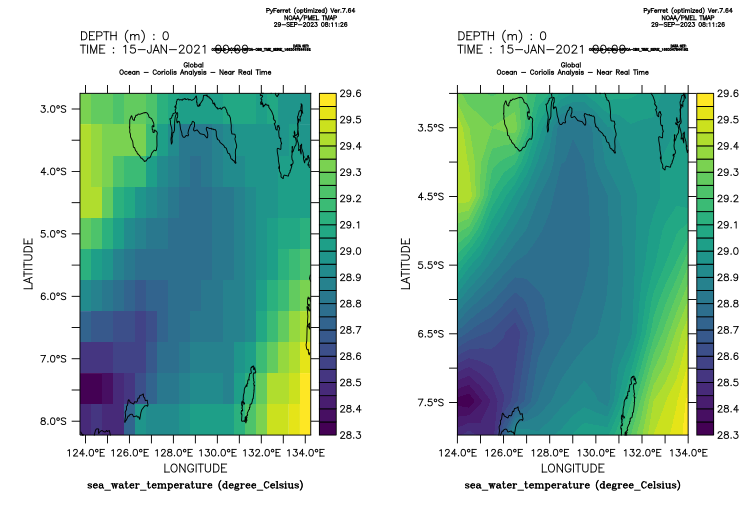

In [8]:
%%ferret
!perbedaan antara shade dan fill
set win/as=0.7
set viewport left; shade TEMP[l=1,k=1]; go land_detail
set viewport right; fill TEMP[l=1,k=1]; go land_detail

In [20]:
%%ferret
stat temp[T=16-JAN-2021,z=0:50@AVE]
stat temp[T=16-JUL-2021,z=0:50@AVE]

sea_water_temperature
 LONGITUDE: 123.75E to 134.25E
 LATITUDE: 8.222S to 2.749S
 DEPTH (m): 0 to 50 (averaged)
 TIME: 15-JAN-2021 00:00
 E: N/A
 F: N/A
 DATA SET: ./CORIOLIS-GLOBAL-NRTOA-OBS_TIME_SERIE_1663047844192.nc
 
 Total # of data points: 231 (21*11*1*1*1*1)
 # flagged as bad data: 0
 Minimum value: 27.624
 Maximum value: 29.374
 Mean value: 28.61 (unweighted average)
 Standard deviation: 0.38564
 
 sea_water_temperature
 LONGITUDE: 123.75E to 134.25E
 LATITUDE: 8.222S to 2.749S
 DEPTH (m): 0 to 50 (averaged)
 TIME: 15-JUL-2021 00:00
 E: N/A
 F: N/A
 DATA SET: ./CORIOLIS-GLOBAL-NRTOA-OBS_TIME_SERIE_1663047844192.nc
 
 Total # of data points: 231 (21*11*1*1*1*1)
 # flagged as bad data: 0
 Minimum value: 25.034
 Maximum value: 28.204
 Mean value: 26.61 (unweighted average)
 Standard deviation: 0.62269

! Enter_GO land_detail
! Exit_GO
! Enter_GO land_detail
! Exit_GO


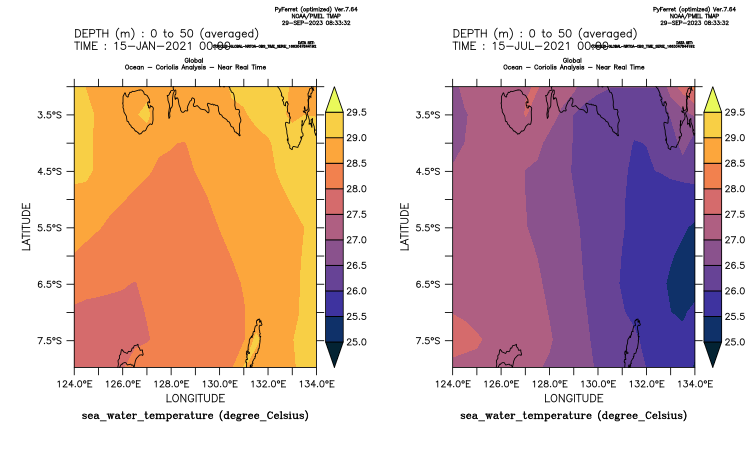

In [21]:
%%ferret
set win/as=0.6
set viewport left; fill /pal=cmocean_thermal/lev=(-inf)(25,29.5,0.5)(inf) temp[T=16-JAN-2021,z=0:50@AVE]; go land_detail
set viewport right; fill /pal=cmocean_thermal/lev=(-inf)(25,29.5,0.5)(inf) temp[T=16-JUL-2021,z=0:50@AVE]; go land_detail
frame/file = perbandingan_jan_aug_temp.png /ypixels=3000

In [22]:
%%ferret
let dyn_S = PSAL
let dyn_T = TEMP
let dyn_P = z[gz=TEMP]
set region/z=0:1000
go dynamic_height

! Enter_GO dynamic_height
*** INSTRUCTIONS:
1) Use LET to define three variables:
dyn_S - your salinity (PPT/1000 - 1)
dyn_T - your temperature (degrees C)
dyn_P - your pressure (millibars) (or depth in meters)
note: if you use "Z" for pressure use the G= syntax e.g. Z[G=TEMP]
so that FERRET knows which Z axis to use
2) Use the SET REGION command to specify the depth of zero motion
e.g. SET REGION/Z=0:1000 to set 1000 meters as the zero motion depth
3) Results will be available as the following LET variables:
Result XY plane XZ or YZ plane
--------- -------- --------------
Dynamic height (dynamic cm) DYN_HT DYN_HTz
Geostriphic velocity(cm/sec) GEO_U,GEO_V GEO_Uz,GEO_Vz
4) Examples: yes? CONTOUR/X=160e:160w/y=10s:10n DYN_HT <-- in the XY plane
or yes? CONTOUR/X=180/Y=10S:10n DYN_HTz <-- in the YZ plane
The difference in dynamic height between two depths (pressure levels)
may be expressed as e.g. z=500m to 1000m --> DYN_HT[Z=500:1000]
! Exit_GO

! Enter_GO land_detail
! Exit_GO


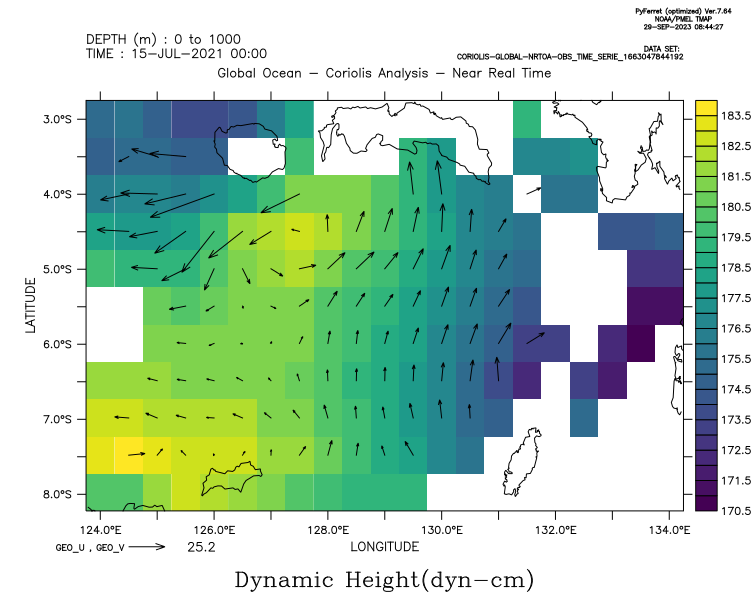

In [23]:
%%ferret
shade DYN_HT[l=7]; vector /ov GEO_U[l=7],GEO_V[l=7]; go land_detail

DATA SET: ./CORIOLIS-GLOBAL-NRTOA-OBS_TIME_SERIE_1663047844192.nc
 Global Ocean - Coriolis Analysis - Near Real Time
 DEPTH (m): 0 to 1000
 LONGITUDE: 128E
 LATITUDE: 4.994S
 Column 1: GEO_UZ[T=15-JAN-2021 00:00] is Geostrophic U (cm/sec)
 Column 2: GEO_UZ[T=15-AUG-2021 00:00] is Geostrophic U (cm/sec)
 GEO_UZ GEO_UZ
0 / 1: 5.787 -1.785
3 / 2: 5.691 -1.873
5 / 3: 5.551 -1.992
10 / 4: 5.289 -2.126
15 / 5: 5.009 -2.274
20 / 6: 4.714 -2.432
25 / 7: 4.447 -2.568
30 / 8: 4.193 -2.678
35 / 9: 3.941 -2.751
40 / 10: 3.702 -2.786
45 / 11: 3.462 -2.784
50 / 12: 3.214 -2.740
55 / 13: 2.949 -2.605
60 / 14: 2.657 -2.372
65 / 15: 2.340 -2.049
70 / 16: 1.985 -1.637
75 / 17: 1.612 -1.129
80 / 18: 1.293 -0.620
85 / 19: 1.041 -0.124
90 / 20: 0.859 0.357
95 / 21: 0.745 0.819
100 / 22: 0.668 1.488
110 / 23: 0.424 2.312
120 / 24: 0.086 3.079
130 / 25: -0.333 3.723
140 / 26: -0.822 4.182
150 / 27: -1.364 4.460
160 / 28: -1.927 4.687
170 / 29: -2.504 4.869
180 / 30: -3.135 4.979
190 / 31: -3.793 5.028
200 / 32: -4.442 5.034
210 / 33: -5.009 5.011
220 / 34: -5.523 4.981
230 / 35: -5.974 4.910
240 / 36: -6.361 4.806
250 / 37: -6.669 4.673
260 / 38: -6.864 4.562
270 / 39: -6.941 4.449
280 / 40: -6.917 4.343
290 / 41: -6.776 4.243
300 / 42: -6.520 4.159
310 / 43: -6.296 4.079
320 / 44: -6.081 4.008
330 / 45: -5.878 3.933
340 / 46: -5.691 3.856
350 / 47: -5.496 3.783
360 / 48: -5.308 3.713
370 / 49: -5.134 3.646
380 / 50: -4.963 3.578
390 / 51: -4.795 3.526
400 / 52: -4.631 3.468
410 / 53: -4.473 3.410
420 / 54: -4.316 3.355
430 / 55: -4.161 3.304
440 / 56: -4.018 3.257
450 / 57: -3.884 3.211
460 / 58: -3.785 3.163
470 / 59: -3.691 3.116
480 / 60: -3.599 3.068
490 / 61: -3.506 3.031
500 / 62: -3.397 2.998
510 / 63: -3.311 2.945
520 / 64: -3.221 2.886
530 / 65: -3.135 2.821
540 / 66: -3.047 2.744
550 / 67: -2.957 2.668
560 / 68: -2.866 2.578
570 / 69: -2.776 2.482
580 / 70: -2.685 2.382
590 / 71: -2.598 2.271
600 / 72: -2.515 2.156
610 / 73: -2.420 2.044
620 / 74: -2.330 1.938
630 / 75: -2.239 1.839
640 / 76: -2.144 1.748
650 / 77: -2.049 1.662
660 / 78: -1.950 1.584
670 / 79: -1.853 1.507
680 / 80: -1.763 1.431
690 / 81: -1.661 1.360
700 / 82: -1.554 1.296
710 / 83: -1.446 1.237
720 / 84: -1.336 1.184
730 / 85: -1.234 1.134
740 / 86: -1.117 1.088
750 / 87: -1.007 1.044
760 / 88: -0.887 0.999
770 / 89: -0.763 0.959
780 / 90: -0.647 0.911
790 / 91: -0.518 0.868
800 / 92: -0.329 0.791
820 / 93: -0.106 0.718
840 / 94: 0.052 0.640
860 / 95: 0.174 0.574
880 / 96: 0.257 0.480
900 / 97: 0.303 0.412
920 / 98: 0.312 0.332
940 / 99: 0.287 0.253
960 / 100: 0.204 0.163
980 / 101: 0.073 0.054
1000 / 102: 0.000 0.000


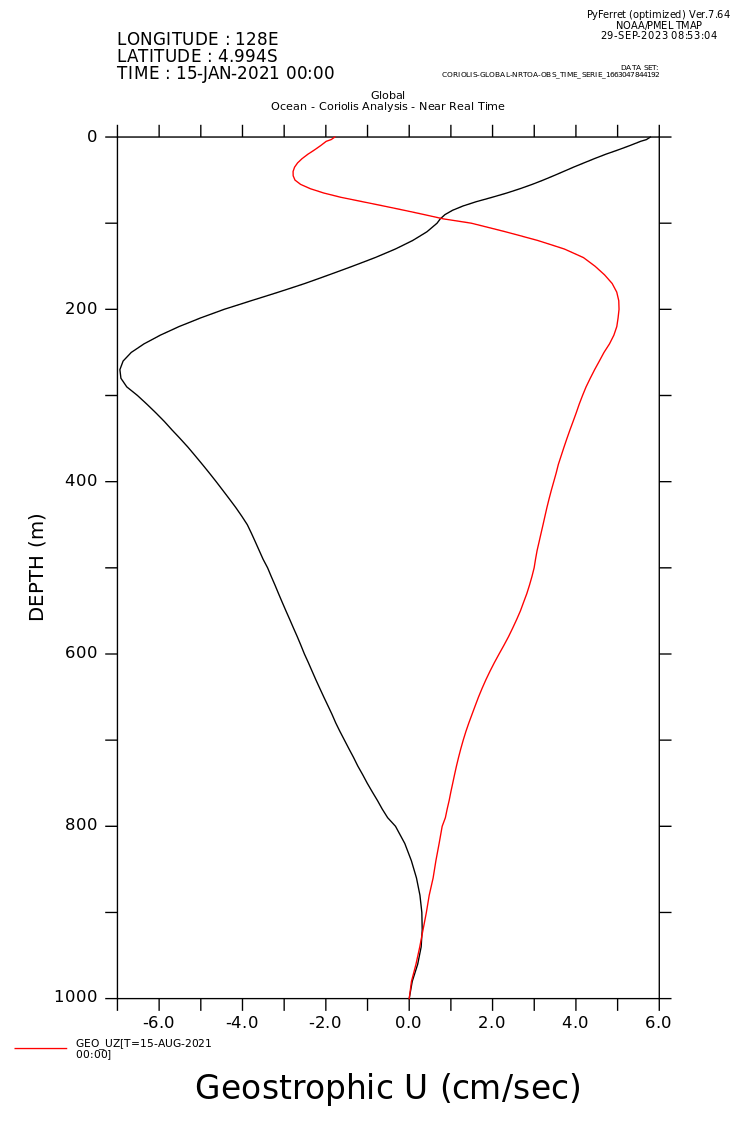

In [24]:
%%ferret
set win/as=1.5
set text/font=arial
plot GEO_UZ[x=128E,y=5S,l=1];plot /ov GEO_UZ[x=128E,y=5S,l=8]
list GEO_UZ[x=128E,y=5S,l=1],GEO_UZ[x=128E,y=5S,l=8]


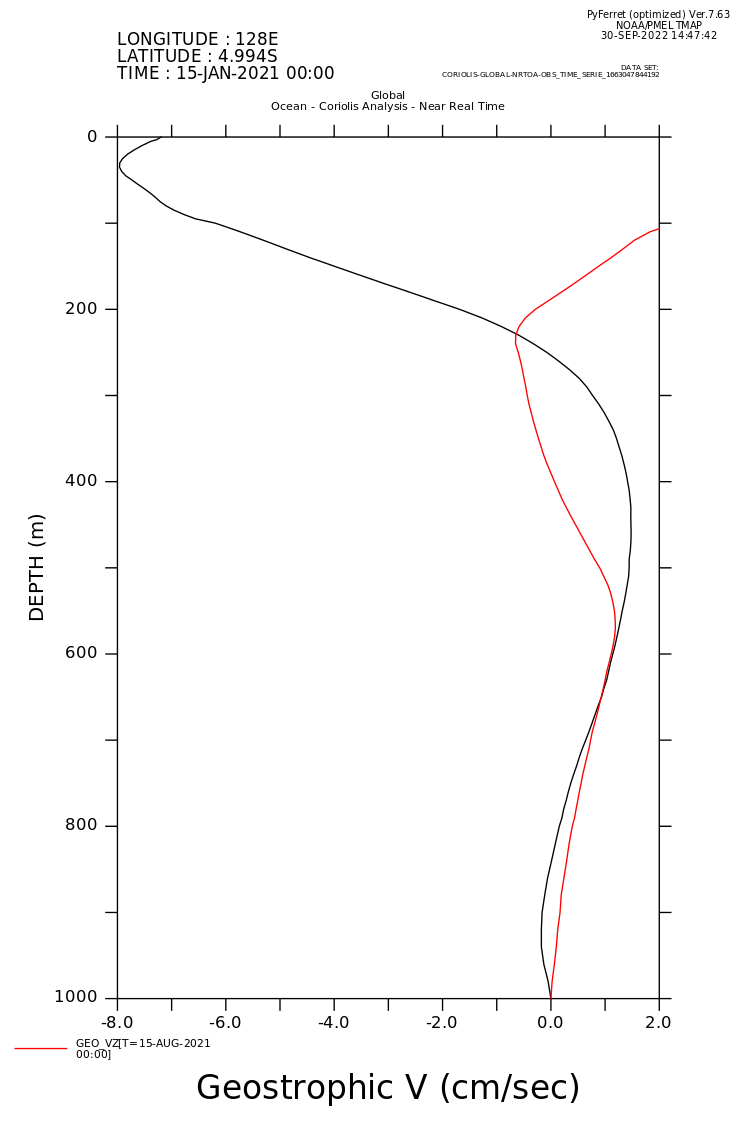

In [16]:
%%ferret
set win/as=1.5
set text/font=arial
plot GEO_VZ[x=128E,y=5S,l=1];plot /ov GEO_VZ[x=128E,y=5S,l=8]


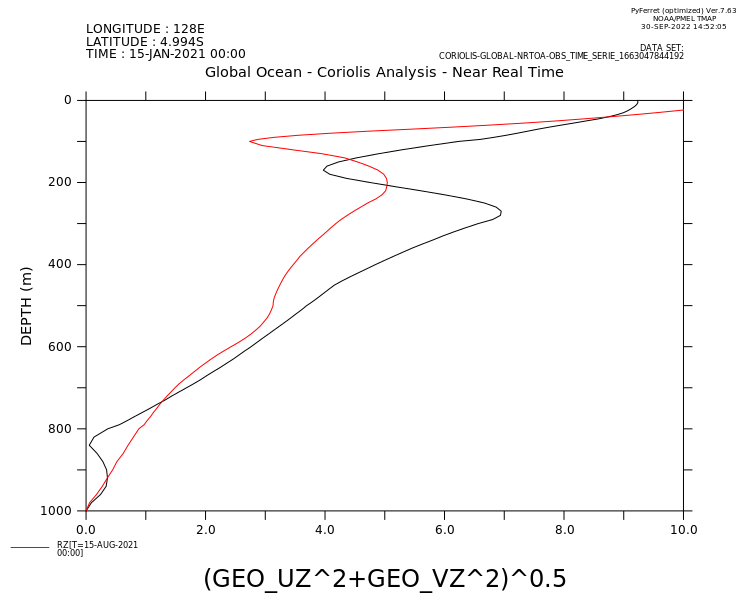

In [18]:
%%ferret
let RZ = (GEO_UZ^2+GEO_VZ^2)^0.5 
plot RZ[x=128E,y=5S,l=1];plot /ov RZ[x=128E,y=5S,l=8]

### Arus total pada kedalaman 50-100 m di bulan januari berkisar antara ... - ... cm/s. titik pertaman m